# BA222 SPRING 2023 – HW02
Due on 03/01 (Wednesday) by 11:59 PM
### by Euijoon David Kim
---

### Instructions
- Submit a single .ipynb (jupyter notebook) file as your solution on Blackboard
- Name the file as BA222_HW02_lastNameFirstName
- Label each cell with the question number
- Type any explanation to your code as a comment

---
---
---

## Part 1: Basic Data Manipulation

For this exercise we are going to work with the housing.csv data (you can find it on Blackboard > Course Material > Data).

This data contains information of houses sold in King County, USA (which includes Seattle) between 2014 and 2015.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Import csv file

df = pd.read_csv('data/housing.csv')
df.head()

,ID,Zip Code,Year Built,Price,Living Space (SQFT),Lot Space (SQFT),Bedrooms,Bathrooms,Number of Floors,Basement,Waterfront
0,439,98115,2000,438000,1270,1372,2,2,3,No,Yes
1,607,98103,2000,531000,1270,1175,2,3,2,Yes,Yes
2,2462,98040,2000,1700000,4930,14649,5,5,2,Yes,Yes
3,2748,98075,2000,726000,2970,10335,5,3,2,No,Yes
4,2856,98122,2000,582000,1670,1189,4,3,3,Yes,Yes


---

##### 1. How many variables and observations are included in the data?

In [3]:
# Output shape

df.shape

(512, 11)

##### Answer:

11 Variables and 512 observations

---

##### 2. What is the data structure and unit of observation?

In [4]:
# Output info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   512 non-null    int64 
 1   Zip Code             512 non-null    int64 
 2   Year Built           512 non-null    int64 
 3   Price                512 non-null    int64 
 4   Living Space (SQFT)  512 non-null    int64 
 5   Lot Space (SQFT)     512 non-null    int64 
 6   Bedrooms             512 non-null    int64 
 7   Bathrooms            512 non-null    int64 
 8   Number of Floors     512 non-null    int64 
 9   Basement             512 non-null    object
 10  Waterfront           512 non-null    object
dtypes: int64(9), object(2)
memory usage: 44.1+ KB


##### Answer:

Data Structure: Cross-Section

Unit of Observation: Integer & String object

---

##### 3. What percentage of houses have a basement?

In [5]:
# Count rows that have basement

withBase = df.loc[df.Basement == 'Yes', 'ID'].count()
withBase

170

In [6]:
# Divide the count by the total number of rows

percentage = round(withBase / df.ID.count() * 100, 2)
percentage

33.2

##### Answer:

33.2 %

---

##### 4. Produce a table with the top 5 most expensive properties in the data.

In [7]:
# Sort values and get the first 5

df.sort_values(by='Price', ascending=False).head()

,ID,Zip Code,Year Built,Price,Living Space (SQFT),Lot Space (SQFT),Bedrooms,Bathrooms,Number of Floors,Basement,Waterfront
373,1449,98004,2009,5350000,8000,23985,5,5,2,Yes,No
42,8639,98004,2001,4489000,6430,27517,4,3,2,No,No
468,5881,98039,2014,3418800,5450,20412,5,5,2,No,Yes
305,20296,98004,2007,3204000,4810,18851,4,4,2,No,Yes
53,301,98074,2002,3075000,4550,18641,4,5,1,Yes,No


##### OR

In [8]:
# Use built-in pandas function nlargest to get the top 5

df.nlargest(columns='Price',n=5)

,ID,Zip Code,Year Built,Price,Living Space (SQFT),Lot Space (SQFT),Bedrooms,Bathrooms,Number of Floors,Basement,Waterfront
373,1449,98004,2009,5350000,8000,23985,5,5,2,Yes,No
42,8639,98004,2001,4489000,6430,27517,4,3,2,No,No
468,5881,98039,2014,3418800,5450,20412,5,5,2,No,Yes
305,20296,98004,2007,3204000,4810,18851,4,4,2,No,Yes
53,301,98074,2002,3075000,4550,18641,4,5,1,Yes,No


---

##### 5. A customer is interested in knowing the price distributions of houses with the following characteristics: at least 3 bedrooms, at least 2 bathrooms, at least 2 floors, the lot and living space are not important, nor the variable waterfront. The house cannot be older than 10 years. Filter the data using this conditions and produce a relative frequency table and write a short paragraph describing the distribution of prices.

In [9]:
# Filter the data frame based on the characteristics

filtered_df = df.loc[(df['Bedrooms'] >= 3) & (df['Bathrooms'] >= 2) & (df['Number of Floors'] >= 2) & (df['Year Built'] >= 2004)]
filtered_df.head()

,ID,Zip Code,Year Built,Price,Living Space (SQFT),Lot Space (SQFT),Bedrooms,Bathrooms,Number of Floors,Basement,Waterfront
129,374,98023,2004,380000,3450,9914,5,3,2,No,No
130,572,98075,2004,720000,3200,7708,4,4,2,No,Yes
133,1743,98056,2004,445000,3880,7180,5,3,2,No,No
135,2143,98075,2004,765000,3010,7221,4,4,2,No,Yes
136,2268,98004,2004,2750000,6300,16065,5,4,2,Yes,Yes


In [10]:
# Relative Frequency Table using value_counts

filtered_df['Price'].value_counts(bins=10, normalize=True).sort_index()

(204859.999, 724000.0]    0.659091
(724000.0, 1238000.0]     0.195455
(1238000.0, 1752000.0]    0.086364
(1752000.0, 2266000.0]    0.018182
(2266000.0, 2780000.0]    0.013636
(2780000.0, 3294000.0]    0.018182
(3294000.0, 3808000.0]    0.004545
(3808000.0, 4322000.0]    0.000000
(4322000.0, 4836000.0]    0.000000
(4836000.0, 5350000.0]    0.004545
Name: Price, dtype: float64

##### Answer:

Looking at the relative frequency table, we can assume that the distribution is skewed to the right with the mean and median towards the lower price, while the outliers belong towards the higher price.

---

##### 6. A custumer wants to find the cheapest house located by the Waterfront. Report the ID of the house.

In [11]:
# Find rows that have 'Yes' value in Waterfront column
# Find the smallest value for Price column

df.loc[df.Waterfront == 'Yes'].nsmallest(columns='Price',n=1)

,ID,Zip Code,Year Built,Price,Living Space (SQFT),Lot Space (SQFT),Bedrooms,Bathrooms,Number of Floors,Basement,Waterfront
184,2878,98038,2005,195000,1180,2553,2,2,2,No,Yes


##### Answer:

ID: 2878

---

##### 7. A developer is interested in knowing if older house lose value over time. Group the data by Year Built and compute the average price for each year. What would you say to the developer?

In [12]:
# Group by Year Built

year_group = df.groupby(['Year Built'])['Price'].mean().round(2).reset_index()
year_group

,Year Built,Price
0,2000,870120.69
1,2001,860333.33
2,2002,666677.71
3,2003,459300.00
4,2004,648196.23
5,2005,484279.18
6,2006,579311.96
7,2007,670318.57
8,2008,611440.85
9,2009,645743.62


<AxesSubplot:xlabel='Year Built', ylabel='Price'>

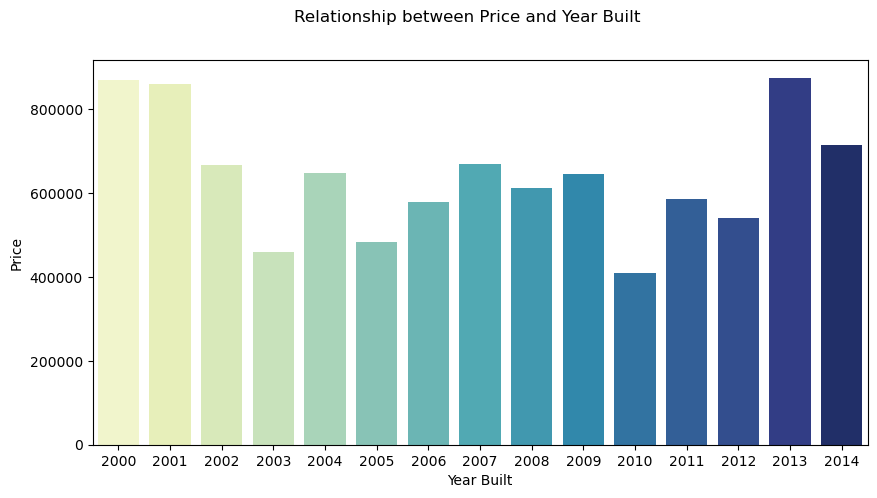

In [13]:
# Plot a graph

plt.figure(figsize = (10,5))
plt.suptitle('Relationship between Price and Year Built')
sns.barplot(x = year_group['Year Built'], y = year_group['Price'], palette='YlGnBu')

In [14]:
# Find correlation

corr = year_group['Year Built'].corr(year_group['Price'])
corr

-0.16293585583203907

Answer:

Based on the table with price grouped by year built, the older houses did not lose value over time.

---

##### 8. A family wants to buy a house. Banks will only lend then funds up to $500,000 to buy a house. We are going to represent the families preferences with an index. To produce an index you will have to first standardize all the numerical variables in the dataset and convert them to Z-Scores like this:
##### Z − Score = (x − xˉ) / sx
##### where x is the variable, xˉ is the average and sx is the standard deviation. After all variables are normalized, compute the preference index using the following formula:
##### Preference = Bedrooms × 0.2 + Bathrooms × 0.1 + LotSpace × 0.05 + NumberofFloors × 0.05 + Waterfront × 0.05 + Basement × 0.05 + YearBuilt × 0.3
##### For the variables Waterfront and Basement, don't compute the Z-Score, simply transform them to 0 (if no) and 1 (if yes). Report the top 5 houses according to the index that the family can afford. Report the ID and the characteristics of the houses (including price).

In [15]:
# Rename columns for efficiency

df.columns=['ID','ZipCode','YearBuilt','Price','LivingSpace','LotSpace','Bedrooms','Bathrooms','NumberOfFloors','Basement','Waterfront']
df.head()

,ID,ZipCode,YearBuilt,Price,LivingSpace,LotSpace,Bedrooms,Bathrooms,NumberOfFloors,Basement,Waterfront
0,439,98115,2000,438000,1270,1372,2,2,3,No,Yes
1,607,98103,2000,531000,1270,1175,2,3,2,Yes,Yes
2,2462,98040,2000,1700000,4930,14649,5,5,2,Yes,Yes
3,2748,98075,2000,726000,2970,10335,5,3,2,No,Yes
4,2856,98122,2000,582000,1670,1189,4,3,3,Yes,Yes


In [16]:
# Define a function to calculate zscore

def zscore(x, xAvg, xStd):
    return (x-xAvg)/xStd

In [17]:
# Derive columns with 1s and 0s for Basement and Waterfront

def transformYesNo(x):
    if x == 'Yes':
        return 1
    else:
        return 0

df['BasementNum'] = df.Basement.apply(transformYesNo)
df['WaterfrontNum'] = df.Waterfront.apply(transformYesNo)

In [18]:
# Calculate Preference Score

df['PreferenceScore'] =  (zscore(df.Bedrooms,df.Bedrooms.mean(),df.Bedrooms.std())*0.2)+(
                    zscore(df.Bathrooms,df.Bathrooms.mean(),df.Bathrooms.std())*0.1)+(
                    zscore(df.LotSpace,df.LotSpace.mean(),df.LotSpace.std())*0.05)+(
                    zscore(df.NumberOfFloors,df.NumberOfFloors.mean(),df.NumberOfFloors.std())*0.05)+(
                    df.WaterfrontNum*0.05)+(
                    df.BasementNum*0.05)+(
                    zscore(df.YearBuilt,df.YearBuilt.mean(),df.YearBuilt.std())*0.3)

In [19]:
# Find the houses that are priced up to 500,000
# Sort values based on preference score and get the top 5

df.loc[df.Price<=500000].sort_values(by='PreferenceScore', ascending=False).head(5)

,ID,ZipCode,YearBuilt,Price,LivingSpace,LotSpace,Bedrooms,Bathrooms,NumberOfFloors,Basement,Waterfront,BasementNum,WaterfrontNum,PreferenceScore
509,21523,98118,2014,462500,2390,4000,6,3,2,No,Yes,0,1,1.136982
484,20473,98042,2014,479349,3223,6371,5,3,2,No,Yes,0,1,0.957719
397,20985,98002,2009,343000,2732,7655,6,5,2,No,No,0,0,0.946555
507,21413,98168,2014,334950,2230,8642,5,3,1,Yes,Yes,1,1,0.928905
504,21234,98042,2014,469950,3223,6371,5,3,2,No,No,0,0,0.907719


In [132]:
df.describe()

,ID,ZipCode,YearBuilt,Price,LivingSpace,LotSpace,Bedrooms,Bathrooms,NumberOfFloors,BasementNum,WaterfrontNum,PreferenceScore
count,512.000000,512.000000,512.000000,5.120000e+02,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,13890.984375,98076.386719,2006.515625,6.341306e+05,2348.371094,15386.859375,3.343750,2.642578,1.882812,0.332031,0.498047,0.041504
std,7105.417692,47.070489,3.984283,5.368430e+05,1245.697329,65982.680533,1.104607,0.857329,0.620852,0.471403,0.500485,0.437142
min,227.000000,98001.000000,2000.000000,1.550000e+05,550.000000,600.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.183852
25%,7424.250000,98038.000000,2003.000000,3.691250e+05,1408.750000,1830.000000,3.000000,2.000000,1.000000,0.000000,0.000000,-0.319643
50%,16476.500000,98065.000000,2006.000000,4.607500e+05,1938.000000,5094.500000,3.000000,3.000000,2.000000,0.000000,0.000000,0.021189
75%,20443.000000,98116.000000,2009.000000,6.708000e+05,3002.500000,8043.500000,4.000000,3.000000,2.000000,1.000000,1.000000,0.304156
max,21605.000000,98199.000000,2014.000000,5.350000e+06,8000.000000,982278.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.269377


Answer: ID 21523, 20473, 20985, 21413, 21234

It has 5 or more bedrooms, 3 or more bathrooms, mostly 2 floors, not many have basement, more than half has waterfront, mostly above average for living space, etc.

---
---
---

## Part 2: Summary Statistics

For this part we are going to use the CASchools.csv data (you can find it on Blackboard > Course Material > Data).

Read the data dictionary before you start working on the exercise.

In [20]:
# Import csv file

df2 = pd.read_csv('data/CASchools.csv')
df2.drop(columns='Unnamed: 0', inplace=True)
df2.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024


---

##### 1. How many variables and observations are in the data?

In [21]:
# Output shape

df2.shape

(420, 14)

Answer: 14 Variables and 420 Observations

---

##### 2. How many variables are numerical? How many are categorical?

In [22]:
# Numerical
len(df2._get_numeric_data().columns)

11

In [23]:
# Categorical
len(set(df2.columns)-set(df2._get_numeric_data().columns))

3

Answer: 11 Numerical Variables and 3 Categorical Variables

---

##### 3. Compute the mean and standard deviation of the variable math. Produce a 1 standard deviation around the mean. What can you say about observations that lie within the 1 standard deviation interval?

In [24]:
# Describe the variable 'math'

df2.math.describe()

count    420.000000
mean     653.342619
std       18.754202
min      605.400024
25%      639.375015
50%      652.449982
75%      665.849991
max      709.500000
Name: math, dtype: float64

In [25]:
# mean - one standard deviation

df2.math.mean() - df2.math.std()

634.5884163515497

In [26]:
# mean + one standard deviation

df2.math.mean() + df2.math.std()

672.0968206979741

Answer: Range between 634.59 and 672.1 in a normal distribution represents the 68% of values.

---

##### 4. Produce a histogram of the variable math . Make sure to label the axis correctly and to add a title to the graph. Is the distribution symmetric or skewed? unimodal, bimodal or uniform?

<AxesSubplot:xlabel='math', ylabel='Count'>

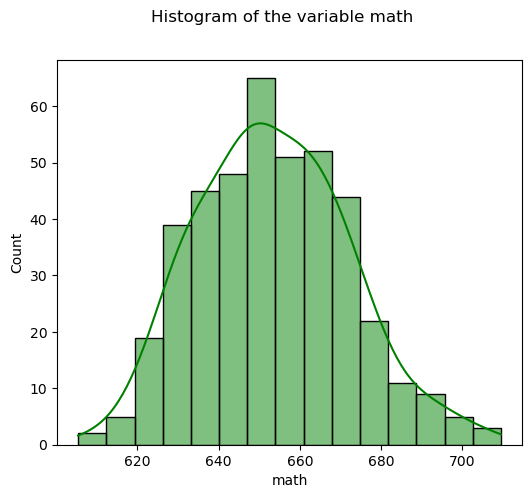

In [27]:
# Plot Histogram for Variable math (Added kde to see probability density)

plt.figure(figsize=(6,5))
plt.suptitle('Histogram of the variable math')
sns.histplot(data=df2, x="math", kde=True, color='green')

Answer: The distribution is fairly symmetric and unimodal.

---

##### 5. Produce a relative frequency table for the variable math . Use 7 bins. If a school is selected randomly, from which bin do you think they are more likely to be in?

<AxesSubplot:xlabel='math', ylabel='Count'>

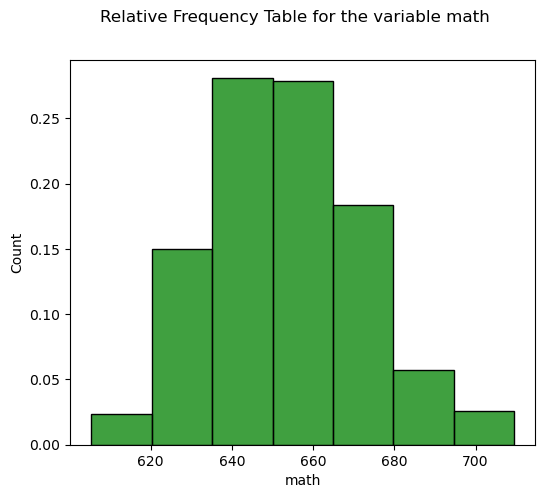

In [28]:
# Plot the relative frequency table for variable 'math'

plt.figure(figsize=(6,5))
plt.suptitle('Relative Frequency Table for the variable math')
sns.histplot(data=df2, x='math', weights=np.ones_like(df2.math)/len(df2.math), bins=7, color='green')

Answer: The 3rd or 4th bin

---

##### 6. Repeat questions 3, 4, and 5 but this time use the variable income.

In [73]:
# Describe income variable

df2.income.describe()

count    420.000000
mean      15.316588
std        7.225890
min        5.335000
25%       10.639000
50%       13.727800
75%       17.629001
max       55.327999
Name: income, dtype: float64

In [75]:
# Mean - One Standard Deviation

df2.income.mean() - df2.income.std()

8.090698290124974

In [76]:
# Mean + One Standard Deviation

df2.income.mean() + df2.income.std()

22.542477816375026

Answer: Range between 8.09 and 22.54 in a normal distribution represents the 68% of values.

<AxesSubplot:xlabel='income', ylabel='Count'>

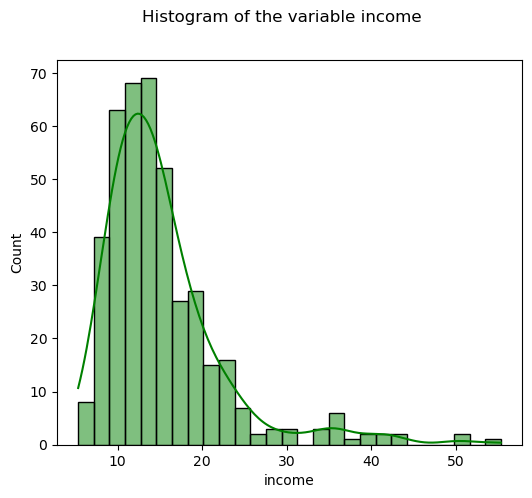

In [32]:
# Find histogram of the variable income

plt.figure(figsize=(6,5))
plt.suptitle('Histogram of the variable income')
sns.histplot(data=df2, x="income", kde=True, color='green')

Answer: Skewed to the right and Unimodal

<AxesSubplot:xlabel='income', ylabel='Count'>

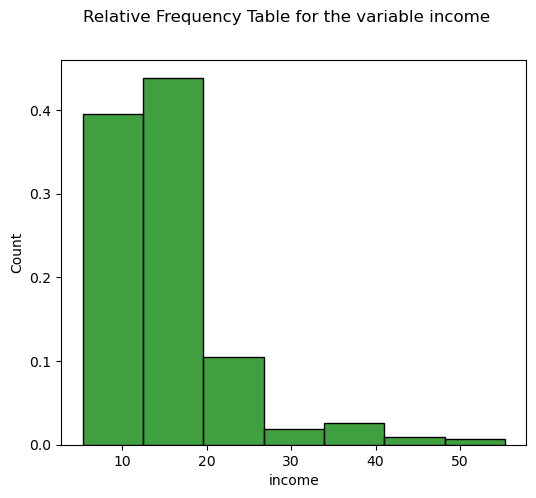

In [77]:
# Find relative frequency table for the variable income

plt.figure(figsize=(6,5))
plt.suptitle('Relative Frequency Table for the variable income')
sns.histplot(data=df2, x='income', weights=np.ones_like(df2.income)/len(df2.income), bins=7, color='green')

Answer: The 1st or 2nd Bin

---

##### 7. Produce a pie chart using the variable Grades. Do you think the distribution of Grades is uniform? Explain.

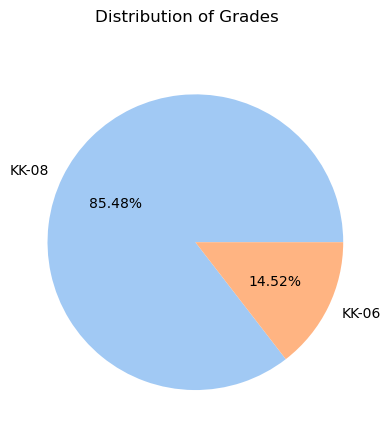

In [34]:
data = list(df2.grades.value_counts())
labels = list(df2.grades.value_counts().index)

colors = sns.color_palette('pastel')

plt.suptitle('Distribution of Grades')
plt.pie(data, labels=labels, colors=colors, autopct='%.2f%%')
plt.show()

Answer: No. The distribution of grades is not uniform. The number of KK-08 grades is much higher than the number of KK-06 grades.

---

##### 8. Compare the distributions of math and read . Which one has the greatest average? which one has the greatest variability?

In [91]:
df2.math.describe()

count    420.000000
mean     653.342619
std       18.754202
min      605.400024
25%      639.375015
50%      652.449982
75%      665.849991
max      709.500000
Name: math, dtype: float64

In [92]:
df2.read.describe()

count    420.000000
mean     654.970477
std       20.107980
min      604.500000
25%      640.400024
50%      655.750000
75%      668.725006
max      704.000000
Name: read, dtype: float64

In [79]:
df2.math.mean()

653.3426185247619

In [81]:
df2.math.var()

351.72009915371876

In [80]:
df2.read.mean()

654.9704770038096

In [82]:
df2.read.var()

404.33086056492

Answer: Read has a greater mean and variance than that of math.

---

##### 9. Produce a variable called academicPerformance which is the average of the math and read scores. Use it to produce a top 10 of the counties with highest academic performance. Repeat this exercise using only math and then only using read.

In [83]:
# Calculate academic performance

df2['academicPerformance'] = (df2.read+df2.math)/2
df2

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,690.799988
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,661.200012
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,643.600006
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,647.700012
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,640.850006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,68957,Las Lomitas Elementary,San Mateo,KK-08,984,59.730000,0.101600,3.556900,195,7290.338867,28.716999,5.995935,700.900024,707.700012,704.300018
416,69518,Los Altos Elementary,Santa Clara,KK-08,3724,208.479996,1.074100,1.503800,721,5741.462891,41.734108,4.726101,704.000000,709.500000,706.750000
417,72611,Somis Union Elementary,Ventura,KK-08,441,20.150000,3.563500,37.193802,45,4402.831543,23.733000,24.263039,648.299988,641.700012,645.000000
418,72744,Plumas Elementary,Yuba,KK-08,101,5.000000,11.881200,59.405899,14,4776.336426,9.952000,2.970297,667.900024,676.500000,672.200012


In [37]:
# Group by county with average math, read, and academic performance
# Find top 10 counties with highest academic performance

county_group = df2.groupby(by='county', as_index=False)[['math','read','academicPerformance']].mean()
county_group.sort_values(by='academicPerformance',ascending=False).head(10).county

0             Alameda
16              Marin
40            Trinity
33         Santa Cruz
3        Contra Costa
30          San Mateo
31      Santa Barbara
20             Nevada
22             Placer
29    San Luis Obispo
Name: county, dtype: object

In [84]:
# Another method to find top 10 counties with highest academic performance

county_group.nlargest(n=10, columns='academicPerformance')

,county,math,read,academicPerformance
0,Alameda,690.000000,691.599976,690.799988
16,Marin,676.200012,684.849998,680.525005
40,Trinity,676.649994,676.449982,676.549988
33,Santa Cruz,672.099993,677.100002,674.599997
3,Contra Costa,672.014291,675.142866,673.578578
30,San Mateo,668.505881,669.476480,668.991180
31,Santa Barbara,666.554549,666.563632,666.559090
20,Nevada,662.922221,669.399997,666.161109
22,Placer,663.000000,668.863625,665.931813
29,San Luis Obispo,663.199982,667.949982,665.574982


In [39]:
# Repeat for Math

county_group.sort_values(by='math',ascending=False).head(10).county

0             Alameda
40            Trinity
16              Marin
33         Santa Cruz
3        Contra Costa
30          San Mateo
31      Santa Barbara
32        Santa Clara
44               Yuba
29    San Luis Obispo
Name: county, dtype: object

In [40]:
county_group.nlargest(n=10, columns='math')

,county,math,read,academicPerformance
0,Alameda,690.000000,691.599976,690.799988
40,Trinity,676.649994,676.449982,676.549988
16,Marin,676.200012,684.849998,680.525005
33,Santa Cruz,672.099993,677.100002,674.599997
3,Contra Costa,672.014291,675.142866,673.578578
30,San Mateo,668.505881,669.476480,668.991180
31,Santa Barbara,666.554549,666.563632,666.559090
32,Santa Clara,665.160001,665.355002,665.257501
44,Yuba,663.750000,664.200012,663.975006
29,San Luis Obispo,663.199982,667.949982,665.574982


In [41]:
# Repeat for Read

county_group.sort_values(by='read',ascending=False).head(10).county

0             Alameda
16              Marin
33         Santa Cruz
40            Trinity
3        Contra Costa
30          San Mateo
20             Nevada
22             Placer
4           El Dorado
29    San Luis Obispo
Name: county, dtype: object

In [42]:
county_group.nlargest(n=10, columns='read')

,county,math,read,academicPerformance
0,Alameda,690.000000,691.599976,690.799988
16,Marin,676.200012,684.849998,680.525005
33,Santa Cruz,672.099993,677.100002,674.599997
40,Trinity,676.649994,676.449982,676.549988
3,Contra Costa,672.014291,675.142866,673.578578
30,San Mateo,668.505881,669.476480,668.991180
20,Nevada,662.922221,669.399997,666.161109
22,Placer,663.000000,668.863625,665.931813
4,El Dorado,661.750000,668.179993,664.964996
29,San Luis Obispo,663.199982,667.949982,665.574982


---

##### 10. Produce a summary statistics table using all the numeric variables and use it to describe the typical school in the data.

In [85]:
# Find a unique school

df2.school.value_counts()

Mountain View Elementary       3
Lakeside Union Elementary      3
Liberty Elementary             2
Pleasant Valley Elementary     2
Jefferson Elementary           2
                              ..
Banta Elementary               1
Plainsburg Union Elementary    1
Camino Union Elementary        1
Redwood City Elementary        1
Wheatland Elementary           1
Name: school, Length: 409, dtype: int64

In [127]:
df2.loc[(df2.school == 'Mountain View Elementary') & (df2.district == 64816)]

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance
32,64816,Mountain View Elementary,Los Angeles,KK-08,10012,464.899994,29.763901,91.593399,721,5036.458984,8.126616,65.121857,620.799988,629.799988,625.299988


In [128]:
# Summary statistics table

df2.describe()

,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,67472.809524,2628.792857,129.067376,13.246042,44.705237,303.383333,5312.407541,15.316588,15.768155,654.970477,653.342619,654.156548
std,3466.994655,3913.104985,187.912679,11.454821,27.123381,441.341298,633.937053,7.225890,18.285927,20.107980,18.754202,19.053347
min,61382.000000,81.000000,4.850000,0.000000,0.000000,0.000000,3926.069580,5.335000,0.000000,604.500000,605.400024,605.550018
25%,64307.750000,379.000000,19.662499,4.395375,23.282200,46.000000,4906.180053,10.639000,1.940807,640.400024,639.375015,640.050003
50%,67760.500000,950.500000,48.564999,10.520450,41.750700,117.500000,5214.516601,13.727800,8.777634,655.750000,652.449982,654.449997
75%,70419.000000,3008.000000,146.350002,18.981350,66.864725,375.250000,5601.401367,17.629001,22.970003,668.725006,665.849991,666.662491
max,75440.000000,27176.000000,1429.000000,78.994202,100.000000,3324.000000,7711.506836,55.327999,85.539719,704.000000,709.500000,706.750000


Answer: The 'Mountain View Elementary' in district 64816 has higher students, teachers, calworks, lunch, computer, expenditure, and english than the average. However, it has a lower income, read, math, and academicPerformance than average.

---

##### 11. Describe the typical school with above average academic performance.

In [45]:
# Find the total average academic performance 
# Find the schools that have an average academic performance that is higher than the total average academic performance

school_group = df2.groupby(by='school', as_index=False)[['read', 'math', 'academicPerformance']].mean()
above_average = school_group.loc[school_group.academicPerformance > np.mean(school_group.academicPerformance)]
above_average.head()

,school,read,math,academicPerformance
0,Ackerman Elementary,671.299988,657.000000,664.149994
2,Alexander Valley Union Elementary,661.700012,658.400024,660.050018
5,Alpine Union Elementary,667.700012,666.599976,667.149994
6,Alta Loma Elementary,663.400024,665.400024,664.400024
8,Alta-Dutch Flat Union Elementary,680.500000,666.599976,673.549988


In [87]:
# I chose Alta Loma Elementary

df2[df2.school == 'Alta Loma Elementary']

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance
292,67595,Alta Loma Elementary,San Bernardino,KK-08,7710,327.299988,4.4722,15.9299,814,4709.054199,18.620199,3.255512,663.400024,665.400024,664.400024


In [129]:
# Summary Statistics Table

df2.describe()

,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,67472.809524,2628.792857,129.067376,13.246042,44.705237,303.383333,5312.407541,15.316588,15.768155,654.970477,653.342619,654.156548
std,3466.994655,3913.104985,187.912679,11.454821,27.123381,441.341298,633.937053,7.225890,18.285927,20.107980,18.754202,19.053347
min,61382.000000,81.000000,4.850000,0.000000,0.000000,0.000000,3926.069580,5.335000,0.000000,604.500000,605.400024,605.550018
25%,64307.750000,379.000000,19.662499,4.395375,23.282200,46.000000,4906.180053,10.639000,1.940807,640.400024,639.375015,640.050003
50%,67760.500000,950.500000,48.564999,10.520450,41.750700,117.500000,5214.516601,13.727800,8.777634,655.750000,652.449982,654.449997
75%,70419.000000,3008.000000,146.350002,18.981350,66.864725,375.250000,5601.401367,17.629001,22.970003,668.725006,665.849991,666.662491
max,75440.000000,27176.000000,1429.000000,78.994202,100.000000,3324.000000,7711.506836,55.327999,85.539719,704.000000,709.500000,706.750000


Answer: Alta Loma Elementary has a higher students, teachers, computer, income, read, math, and academicPerformance than the average. However, has lower calworks, lunch, expenditure, and english than the average

---

##### 12. Describe the typical school with below average academic performance.

In [89]:
# Find the schools that have an average academic performance that is below the total average academic performance

below_average = school_group.loc[school_group.academicPerformance < np.mean(school_group.academicPerformance)]
below_average.head()

,school,read,math,academicPerformance
1,Adelanto Elementary,639.900024,638.799988,639.350006
3,Alisal Union Elementary,620.400024,626.000000,623.200012
4,Allensworth Elementary,612.799988,619.799988,616.299988
7,Alta Vista Elementary,620.700012,623.400024,622.050018
9,Alum Rock Union Elementary,629.500000,631.200012,630.350006


In [90]:
# I chose Adelanto Elementary

df2[df2.school == 'Adelanto Elementary']

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance
104,67587,Adelanto Elementary,San Bernardino,KK-08,4501,227.850006,19.1297,63.905499,597,5356.833496,8.384,17.973783,639.900024,638.799988,639.350006


In [131]:
# Summary Statistics Table

df2.describe()

,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,67472.809524,2628.792857,129.067376,13.246042,44.705237,303.383333,5312.407541,15.316588,15.768155,654.970477,653.342619,654.156548
std,3466.994655,3913.104985,187.912679,11.454821,27.123381,441.341298,633.937053,7.225890,18.285927,20.107980,18.754202,19.053347
min,61382.000000,81.000000,4.850000,0.000000,0.000000,0.000000,3926.069580,5.335000,0.000000,604.500000,605.400024,605.550018
25%,64307.750000,379.000000,19.662499,4.395375,23.282200,46.000000,4906.180053,10.639000,1.940807,640.400024,639.375015,640.050003
50%,67760.500000,950.500000,48.564999,10.520450,41.750700,117.500000,5214.516601,13.727800,8.777634,655.750000,652.449982,654.449997
75%,70419.000000,3008.000000,146.350002,18.981350,66.864725,375.250000,5601.401367,17.629001,22.970003,668.725006,665.849991,666.662491
max,75440.000000,27176.000000,1429.000000,78.994202,100.000000,3324.000000,7711.506836,55.327999,85.539719,704.000000,709.500000,706.750000


Answer: Adelanto Elementary has a higher students, teachers, calworks, lunch, computer, expenditure, and english than the average. However, it has a lower income, read, math, and academicPerformance than the average.

---
---
---

## Part 3: Statistical Association
We are going to continue using the same data as the previous part.

In [51]:
df3 = df2.__deepcopy__()
df3.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,690.799988
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,661.200012
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,643.600006
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,647.700012
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,640.850006


---

##### 1. Do you think the academic performance of KK-08 schools is different in any way to KK-06 schools? What evidence can we use to reject this hypothesis?

In [93]:
# Group by grades with average academic performance

df3.groupby('grades')['academicPerformance'].mean()

grades
KK-06    661.575409
KK-08    652.895961
Name: academicPerformance, dtype: float64

In [97]:
df3.loc[df3.grades == 'KK-06'].academicPerformance.describe()

count     61.000000
mean     661.575409
std       19.679314
min      612.650024
25%      648.949982
50%      664.000000
75%      678.799988
max      698.449982
Name: academicPerformance, dtype: float64

In [98]:
df3.loc[df3.grades == 'KK-08'].academicPerformance.describe()

count    359.000000
mean     652.895961
std       18.681778
min      605.550018
25%      639.425003
50%      653.549988
75%      665.775009
max      706.750000
Name: academicPerformance, dtype: float64

In [120]:
stats.norm.interval(confidence=0.95, loc=np.mean(df3.loc[df3.grades == 'KK-06'].academicPerformance), scale=stats.sem(df3.loc[df3.grades == 'KK-06'].academicPerformance))

(656.6369307750964, 666.5138870970349)

In [121]:
stats.norm.interval(confidence=0.95, loc=np.mean(df3.loc[df3.grades == 'KK-08'].academicPerformance), scale=stats.sem(df3.loc[df3.grades == 'KK-08'].academicPerformance))

(650.9634631900783, 654.8284594611753)

Answer: Based on the 95% confidence interval of academic performance of both grades, they are different. The means are different and their confidence intervals don't overlap. The 95% confidence interval shows that there is 95% chance that the confidence interval contains the true population mean height of plants. Therefore, we do not reject the hypothesis.

---

##### 2. Do higher income counties (those above the 80th income percentile) perform better or worse academically? Answer this question by comparing them to the bottom 20th percentile. Produce a bar chart to summarize your findings. Make sure to label the axis correctly and to add a title.

In [55]:
# Group by Counties

county_income_group = df3.groupby('county', as_index=False)[['income','academicPerformance']].mean()
county_income_group.head()

,county,income,academicPerformance
0,Alameda,22.690001,690.799988
1,Butte,9.205243,645.183334
2,Calaveras,13.243000,656.800018
3,Contra Costa,25.265674,673.578578
4,El Dorado,15.964900,664.964996


In [99]:
# Find the 80th income percentile and the bottom 20th percentile

p80 = county_income_group.income.quantile(q=0.8)
p20 = county_income_group.income.quantile(q=0.2)
print(p80, p20)

17.43584316324138 10.815359478244444


In [100]:
# Find the counties above 80th income percentile

high_income = county_income_group.loc[county_income_group.income > p80]
high_income['incomeLevel'] = 'high'
high_income.sort_values(by='income', ascending=False, inplace=True)
high_income

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_41204/3170396610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_income['incomeLevel'] = 'high'
/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_41204/3170396610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_income.sort_values(by='income', ascending=False, inplace=True)


,county,income,academicPerformance,incomeLevel
16,Marin,32.185312,680.525005,high
30,San Mateo,27.461052,668.991180,high
3,Contra Costa,25.265674,673.578578,high
32,Santa Clara,24.026920,665.257501,high
31,Santa Barbara,22.780021,666.559090,high
0,Alameda,22.690001,690.799988,high
33,Santa Cruz,20.398662,674.599997,high
27,San Diego,17.448104,660.423811,high
36,Sonoma,17.445289,664.543103,high


In [101]:
# Find the counties below 20th income percentile

low_income = county_income_group.loc[county_income_group.income < p20]
low_income['incomeLevel'] = 'low'
low_income.sort_values(by='income', ascending=False, inplace=True)
low_income

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_41204/1833093667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_income['incomeLevel'] = 'low'
/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_41204/1833093667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_income.sort_values(by='income', ascending=False, inplace=True)


,county,income,academicPerformance,incomeLevel
12,Lake,10.796500,641.475006,low
6,Glenn,10.639000,660.966675,low
39,Tehama,10.507125,653.262489,low
17,Mendocino,10.035000,639.300018,low
18,Merced,10.018221,636.250003,low
41,Tulare,9.918167,638.691669,low
8,Imperial,9.677167,640.683339,low
5,Fresno,9.269000,636.237501,low
1,Butte,9.205243,645.183334,low


In [102]:
# Merge the two tables

merged_income = high_income.merge(low_income, how='outer')
merged_income

,county,income,academicPerformance,incomeLevel
0,Marin,32.185312,680.525005,high
1,San Mateo,27.461052,668.991180,high
2,Contra Costa,25.265674,673.578578,high
3,Santa Clara,24.026920,665.257501,high
4,Santa Barbara,22.780021,666.559090,high
5,Alameda,22.690001,690.799988,high
6,Santa Cruz,20.398662,674.599997,high
7,San Diego,17.448104,660.423811,high
8,Sonoma,17.445289,664.543103,high
9,Lake,10.796500,641.475006,low


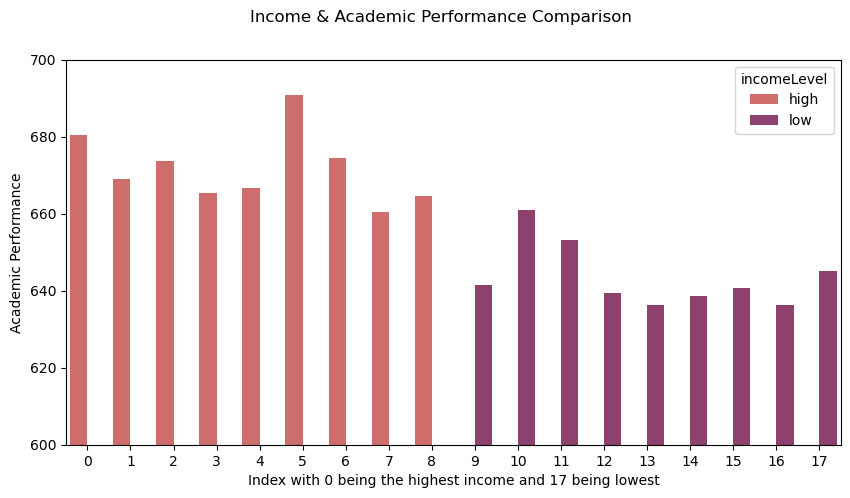

In [103]:
# Create a bar plot of the table

plt.figure(figsize=(10,5))
plt.ylim([600,700])
plt.suptitle('Income & Academic Performance Comparison')

ax = sns.barplot(data=merged_income, x=merged_income.index, y='academicPerformance', hue='incomeLevel', errorbar=None, palette='flare')
ax.set(xlabel='Index with 0 being the highest income and 17 being lowest', ylabel='Academic Performance')

plt.show()

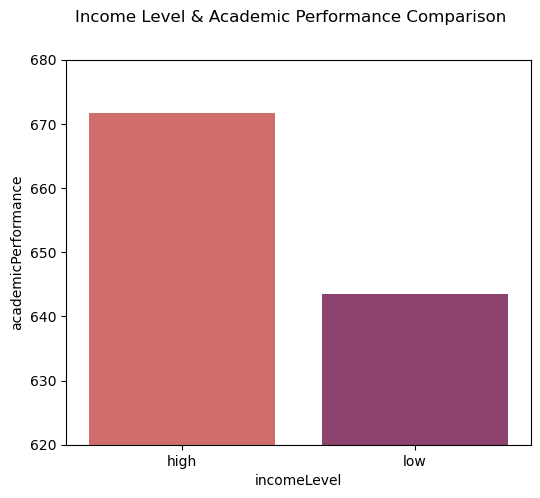

In [104]:
# Create a barplot of the average academic performance of each high and low category I created

plt.figure(figsize=(6,5))
plt.ylim([620,680])
plt.suptitle('Income Level & Academic Performance Comparison')

level_perf = merged_income.groupby('incomeLevel', as_index=False)['academicPerformance'].mean()

sns.barplot(data=level_perf, x='incomeLevel', y='academicPerformance', errorbar=None, palette='flare')

plt.show()

Answer: Comparing the academic performance within the high income counties (above 80th percentile) doesn't show much difference or correlation. However, when compared between the counties above 80th percentile and the counties below 20th percentile, the difference and correlation in academic performance is apparent. Therefore, the high income counties tend to have better academic performances.

---

##### 3. Use a scatterplot and describe the relation between income and math . Make sure to label the axis correctly and to add a title. Can we use the correlation coefficient to determine the degree of statistical association between the two variables? (Hint: the correlation coefficient have a downward bias for statistical relations that are non-linear)

<AxesSubplot:xlabel='income', ylabel='math'>

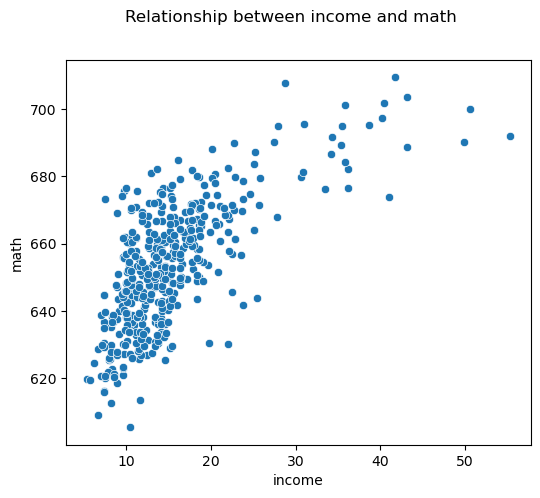

In [105]:
# Scatterplot

plt.figure(figsize=(6,5))
plt.suptitle('Relationship between income and math')

sns.scatterplot(data=df3, x='income', y='math')

In [106]:
# Correlation coefficient

df3.income.corr(df3.math)

0.699398144189934

Answer: When income increases, the math score tend to increase in a non-linear manner. Correlation coefficient measures the strength of linear relationship and it is only sensitie to linear correlations, therefore, it may provide inaccurate explanation for non-linear relationships. The correlation coefficient shows a strong positive correlation between income and math, but since it's non-linear, it may be wrong.

---

#### 4. Use a scatterplot and describe the relation between english and read. Make sure to label the axis correctly and to add a title. Can we use the correlation coefficient to determine the degree of statistical association between the two variables?

<AxesSubplot:xlabel='english', ylabel='read'>

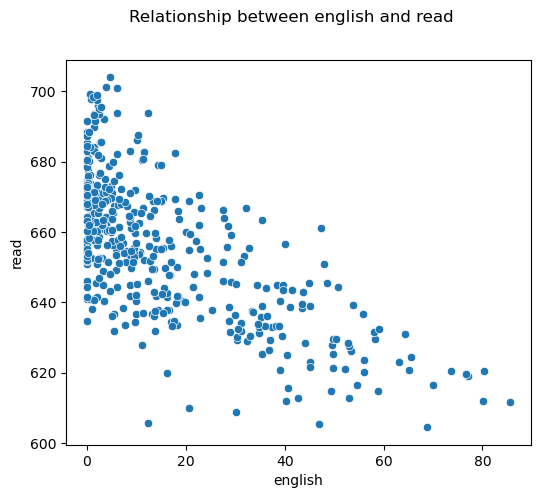

In [64]:
plt.figure(figsize=(6,5))
plt.suptitle('Relationship between english and read')

sns.scatterplot(data=df3, x='english', y='read')

In [65]:
df3.english.corr(df3.read)

-0.6902858651905355

Answer: The scatterplot seem like the read generally increases as english decreases. The correlation coefficient also indicates a strong negative correlation and we can define the scatterplot as a linear relationship.

---

##### 5. Create a variable and call it str , which is short for student-to-teacher ratio. The variable should be equal to the ratio of students to teachers variables. Do you think str is related to the students academic performance? Produce your own evidence and write a short paragraph outlining your conclusions.

In [109]:
# Derived variable for student to teacher ratio

df3['str'] = df3.students / df3.teachers
df3.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance,str
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,690.799988,17.889909
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,661.200012,21.524664
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,643.600006,18.697225
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,647.700012,17.357143
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,640.850006,18.671329


<AxesSubplot:xlabel='str', ylabel='academicPerformance'>

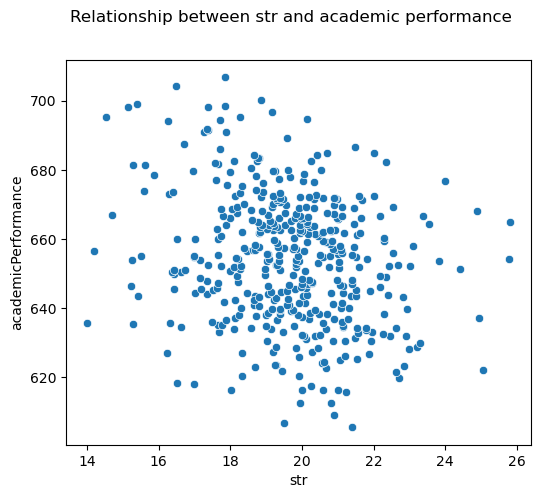

In [110]:
# Scatterplot

plt.figure(figsize=(6,5))
plt.suptitle('Relationship between str and academic performance')

sns.scatterplot(data=df3, x='str', y='academicPerformance')

In [111]:
# Correlation Coefficient

df3.str.corr(df3.academicPerformance)

-0.22636274558209943

Answer: The scatterplot shows that there are zero correlation between the academic performance and the student-to-teacher ratio. Also, since it is a non-linear relationship, the correlation coefficient stating as weak negative correlation is incorrect.

---

##### 6. Explore the data set freely (you can use your previous answers) with the goal of finding what variables are related to academic performance. Then write a hypothesis (a possible explanation) about what may cause some schools to perform better or worse academically. Back up your claims with tabular and graphical evidence.

In [112]:
# Correlation coefficient chart

df3.corr(numeric_only=True)

,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,academicPerformance,str
district,1.000000,-0.033569,-0.031524,-0.161727,-0.108032,-0.020999,0.049172,0.103910,-0.026967,0.106576,0.117713,0.114170,-0.058951
students,-0.033569,1.000000,0.997116,0.090161,0.129234,0.928882,-0.112285,0.028392,0.354879,-0.188399,-0.110889,-0.153987,0.298481
teachers,-0.031524,0.997116,1.000000,0.092645,0.124296,0.937242,-0.095195,0.043007,0.351421,-0.179109,-0.102296,-0.144857,0.264641
calworks,-0.161727,0.090161,0.092645,1.000000,0.739422,0.059160,0.067889,-0.512651,0.319576,-0.611847,-0.617691,-0.626853,0.018276
lunch,-0.108032,0.129234,0.124296,0.739422,1.000000,0.061386,-0.061039,-0.684440,0.653061,-0.878808,-0.823015,-0.868772,0.135203
computer,-0.020999,0.928882,0.937242,0.059160,0.061386,1.000000,-0.071311,0.094343,0.291339,-0.109005,-0.032950,-0.073736,0.233826
expenditure,0.049172,-0.112285,-0.095195,0.067889,-0.061039,-0.071311,1.000000,0.314484,-0.071396,0.217927,0.154989,0.191273,-0.619982
income,0.103910,0.028392,0.043007,-0.512651,-0.684440,0.094343,0.314484,1.000000,-0.307419,0.697819,0.699398,0.712431,-0.232194
english,-0.026967,0.354879,0.351421,0.319576,0.653061,0.291339,-0.071396,-0.307419,1.000000,-0.690286,-0.568682,-0.644124,0.187642
read,0.106576,-0.188399,-0.179109,-0.611847,-0.878808,-0.109005,0.217927,0.697819,-0.690286,1.000000,0.922901,0.981882,-0.246593


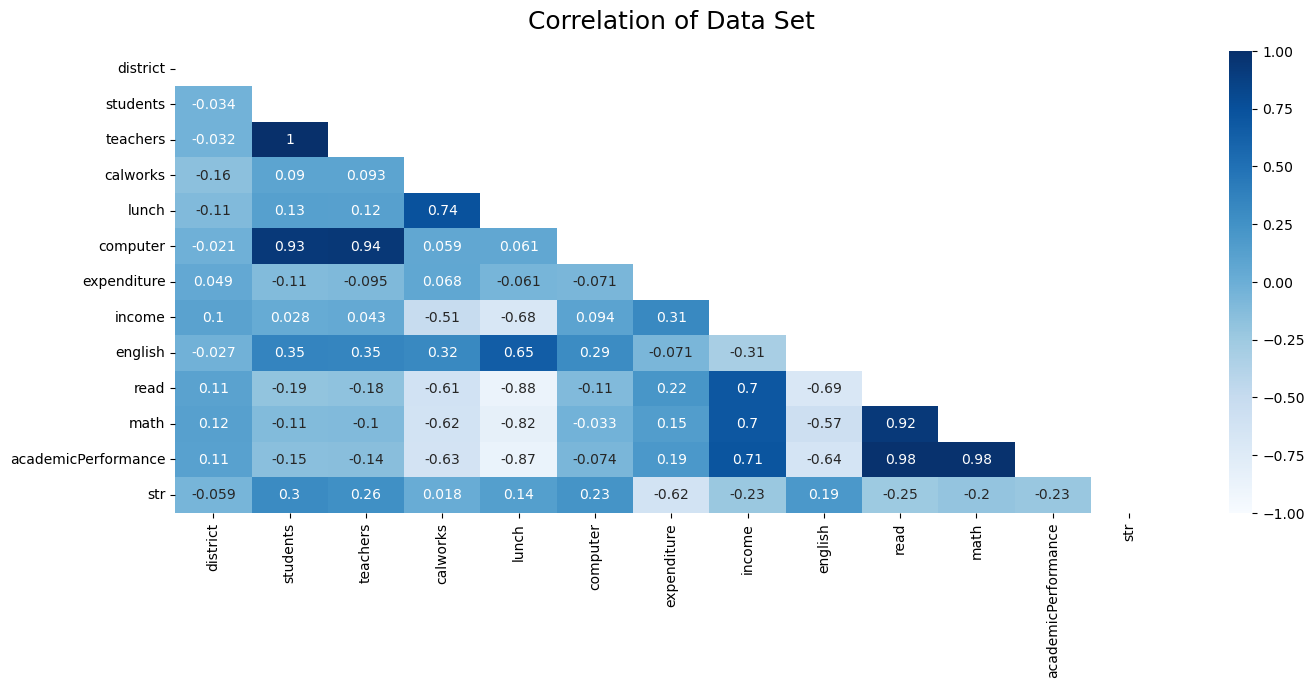

In [70]:
# Heatmap of the correlation coefficient chart

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df3.corr(numeric_only=True), dtype=bool))
heatmap = sns.heatmap(df3.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation of Data Set', fontdict={'fontsize':18}, pad=16)
plt.show()

<Figure size 2000x2000 with 0 Axes>

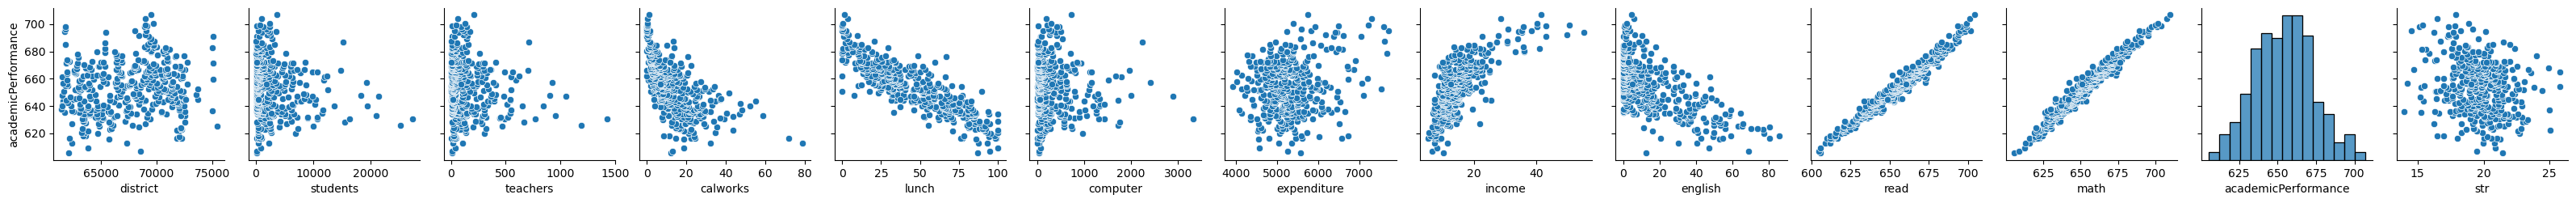

In [115]:
# Pairplot

plt.figure(figsize=(20,20))
plt.suptitle('Pairplot')

sns.pairplot(data=df3, y_vars=['academicPerformance'])

Answer: Based on graphical evidence, we can assume that calworks, lunch, income, english, read, math variables have correlations with the academic performance. The variables with a negative correlation include calworks, lunch, and english, while the variables with a positive correlation include income, read, and math.

---